**Packages to load in **

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Data Loading**

In [ ]:
df_automobile = pd.read_csv("CAR.csv")
df_automobile

,Expense ID,Symboling,Normalized-Losses,Make,Model,Fuel-Type,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,1,3,65,Alfa-Romeo,Giulia,Gas,2,Convertible,RWD,Front,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,2,84,Alfa-Romeo,626,Gas,4,Sedan,RWD,Front,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,99,Audi,100,Gas,4,Sedan,FWD,Front,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,84,Audi,5000,Gas,4,Sedan,FWD,Front,...,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30
4,5,3,81,Audi,5000,Gas,4,Wagon,FWD,Front,...,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,178,2,99,Mazda,GLC,Gas,2,Hatchback,FWD,Front,...,four,122,mpfi,3.31,3.54,8.7,92,4200,27,32
178,179,3,81,Mitsubishi,Tredia,Gas,4,Sedan,FWD,Front,...,six,171,mpfi,3.27,3.35,9.3,161,5200,20,24
179,180,1,118,Nissan,Maxima,Petrol,4,Sedan,FWD,Front,...,six,171,mpfi,3.27,3.35,9.3,161,5200,19,24
180,181,2,99,Subaru,DL,Petrol,4,Sedan,FWD,Front,...,six,171,mpfi,3.27,3.35,9.2,156,5200,20,24


**Admin Access**

  1.Adding
  2.updating
  3.deleteing

In [ ]:
import pandas as pd


df_automobile = pd.read_csv("CAR.csv")

# Function to add data to the DataFrame
def add_data(dataframe):
    new_data = {}
    for col in dataframe.columns:
        new_data[col] = input(f"Enter {col}: ")
    dataframe = dataframe.append(new_data, ignore_index=True)
    return dataframe

# Function to update data in the DataFrame
def update_data(dataframe):
    index_to_update = int(input("Enter the index of the entry to update: "))
    column_to_update = input("Enter the column to update: ")
    new_value = input("Enter the new value: ")
    dataframe.at[index_to_update, column_to_update] = new_value
    return dataframe

# Function to delete data from the DataFrame
def delete_data(dataframe):
    index_to_delete = int(input("Enter the index of the entry to delete: "))
    dataframe = dataframe.drop(index_to_delete)
    dataframe = dataframe.reset_index(drop=True)
    return dataframe


while True:
    choice = input("Enter 'A' to add data, 'U' to update data, 'D' to delete data, or 'Q' to quit: ").upper()

    if choice == 'A':
        df_automobile = add_data(df_automobile)
    elif choice == 'U':
        df_automobile = update_data(df_automobile)
    elif choice == 'D':
        df_automobile = delete_data(df_automobile)
    elif choice == 'Q':
        break
    else:
        print("Invalid choice. Please try again.")


print(df_automobile)


Enter 'A' to add data, 'U' to update data, 'D' to delete data, or 'Q' to quit: q
     Expense ID Symboling Normalized-Losses        Make   Model Fuel-Type  \
0             1         3                65  Alfa-Romeo  Giulia       Gas   
1             2         2                84  Alfa-Romeo     626       Gas   
2             3         1                99        Audi     100       Gas   
3             4         2                84        Audi    5000       Gas   
4             5         3                81        Audi    5000       Gas   
..          ...       ...               ...         ...     ...       ...   
177         178         2                99       Mazda     GLC       Gas   
178         179         3                81  Mitsubishi  Tredia       Gas   
179         180         1               118      Nissan  Maxima    Petrol   
180         181         2                99      Subaru      DL    Petrol   
181         182         3                81       Volvo     240    Diese

  **Data Cleaning**

*Data contains "?" replace it with NAN *

In [ ]:
df_data = df_automobile.replace('?',np.NAN)
df_data.isnull().sum()

Expense ID           0
Symboling            2
Normalized-Losses    5
Make                 1
Model                2
Fuel-Type            6
Num-Of-Doors         0
Body-Style           1
Drive-Wheels         1
Engine-Location      0
Price                4
Year                 7
Mileage              0
Condition            3
Payment method       0
Maintenance-Costs    0
Date                 0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
dtype: int64

**Missing Data**

fill missing data of normalised-losses, Price, and many with the respective column mean
Fill missing data category Number of doors with the mode of the column i.e. Four

In [ ]:


# Handling NaN values in 'Normalized-Losses'
df_temp = df_automobile[df_automobile['Normalized-Losses']!='?']
normalised_mean = df_temp['Normalized-Losses'].astype(float).mean()
df_automobile['Normalized-Losses'] = df_automobile['Normalized-Losses'].replace('?',normalised_mean).astype(float)

# Handling NaN values in 'Price'
df_temp = df_automobile[df_automobile['Price']!='?']
normalised_mean = df_temp['Price'].astype(float).mean()
df_automobile['Price'] = df_automobile['Price'].replace('?',normalised_mean).astype(float)



df_temp = df_automobile[df_automobile['horsepower']!='?']
normalised_mean = df_temp['horsepower'].astype(int).mean()
df_automobile['horsepower'] = df_automobile['horsepower'].replace('?',normalised_mean).astype(int)

df_temp = df_automobile[df_automobile['peak-rpm']!='?']
normalised_mean = df_temp['peak-rpm'].astype(int).mean()
df_automobile['peak-rpm'] = df_automobile['peak-rpm'].replace('?',normalised_mean).astype(int)

df_temp = df_automobile[df_automobile['bore']!='?']
normalised_mean = df_temp['bore'].astype(float).mean()
df_automobile['bore'] = df_automobile['bore'].replace('?',normalised_mean).astype(float)

df_temp = df_automobile[df_automobile['stroke']!='?']
normalised_mean = df_temp['stroke'].astype(float).mean()
df_automobile['stroke'] = df_automobile['stroke'].replace('?',normalised_mean).astype(float)

# Handling NaN values in 'Num-Of-Doors'
df_automobile['Num-Of-Doors'] = df_automobile['Num-Of-Doors'].replace('?','four')

# Other columns can be handled similarly

# Example for 'Mileage'
df_temp = df_automobile[df_automobile['Mileage']!='?']
normalised_mean = df_temp['Mileage'].astype(float).mean()
df_automobile['Mileage'] = df_automobile['Mileage'].replace('?',normalised_mean).astype(float)

# Example for 'Year'
df_temp = df_automobile[df_automobile['Year']!='?']
normalised_mean = df_temp['Year'].astype(float).mean()
df_automobile['Year'] = df_automobile['Year'].replace('?',normalised_mean).astype(float)

# Example for 'Fuel-Type'
df_automobile['Fuel-Type'] = df_automobile['Fuel-Type'].fillna('Unknow')

# Example for 'Model'
df_automobile['Model'] = df_automobile['Model'].fillna('Unknown')

# Example for 'Make'
df_automobile['Make'] = df_automobile['Make'].fillna('Unknown')

# Example for 'Body-Style'
df_automobile['Body-Style'] = df_automobile['Body-Style'].fillna('Unknown')

# Example for 'Drive-Wheels'
df_automobile['Drive-Wheels'] = df_automobile['Drive-Wheels'].fillna('Unknown')

# Example for 'Engine-Location'
df_automobile['Engine-Location'] = df_automobile['Engine-Location'].fillna('Unknown')

# Example for 'Condition'
df_automobile['Condition'] = df_automobile['Condition'].fillna('Unknown')

# Example for 'Payment method '
df_automobile['Payment method'] = df_automobile['Payment method'].fillna('Unknown')

# Example for 'Payment method '
df_automobile['Payment method'] = df_automobile['Payment method'].fillna('Unknown')

# Example for 'Maintenance-Costs '
df_automobile['Maintenance-Costs'] = df_automobile['Maintenance-Costs'].fillna('Unknown')

# Example for 'Date '
df_automobile['Date'] = df_automobile['Date'].fillna('Unknown')





# Save the updated DataFrame to a new CSV file
df_automobile.to_csv('car1.csv', index=False)

In [ ]:
df_automobile.head()

,Expense ID,Symboling,Normalized-Losses,Make,Model,Fuel-Type,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,1,3,65.0,Alfa-Romeo,Giulia,Gas,2,Convertible,RWD,Front,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,2,84.0,Alfa-Romeo,626,Gas,4,Sedan,RWD,Front,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,99.0,Audi,100,Gas,4,Sedan,FWD,Front,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,84.0,Audi,5000,Gas,4,Sedan,FWD,Front,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,3,81.0,Audi,5000,Gas,4,Wagon,FWD,Front,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


**Summary statistics of variable**

In [ ]:
df_automobile.describe()

,Expense ID,Normalized-Losses,Num-Of-Doors,Price,Year,Mileage,Maintenance-Costs,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,91.500000,99.491525,3.219780,13118.022472,1992.834286,15.483516,37837.192308,98.365385,173.257692,65.802747,53.476923,2540.417582,127.274725,3.322640,3.252360,9.907802,104.346154,5113.329670,25.241758,30.774725
std,52.683014,15.084703,0.961148,8173.111407,15.186537,6.385174,7557.706995,6.034455,12.450930,2.194806,2.451815,534.960030,43.593315,0.264241,0.328566,3.601923,40.537902,492.557876,6.614634,6.898540
min,1.000000,65.000000,2.000000,5118.000000,1980.000000,5.000000,25041.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,46.250000,81.000000,2.000000,7609.000000,1983.000000,9.250000,30882.750000,94.500000,166.300000,64.000000,51.600000,2120.500000,97.000000,3.150000,3.100000,8.525000,70.000000,4800.000000,19.000000,25.000000
50%,91.500000,99.000000,4.000000,10221.500000,1983.000000,16.000000,38142.500000,96.500000,173.000000,65.400000,53.500000,2410.000000,119.500000,3.316320,3.280000,9.000000,95.000000,5050.000000,24.500000,30.000000
75%,136.750000,118.000000,4.000000,15936.000000,2003.750000,21.000000,44511.750000,101.000000,178.100000,66.500000,54.900000,2846.250000,146.000000,3.580000,3.460000,9.400000,119.000000,5500.000000,30.000000,36.000000
max,182.000000,122.000000,4.000000,45400.000000,2022.000000,25.000000,49985.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,22.700000,288.000000,6600.000000,49.000000,54.000000


**Transpose**

In [ ]:
df_automobile.describe().T

,count,mean,std,min,25%,50%,75%,max
Expense ID,182.0,91.500000,52.683014,1.00,46.250,91.50000,136.75,182.00
Normalized-Losses,182.0,99.491525,15.084703,65.00,81.000,99.00000,118.00,122.00
Num-Of-Doors,182.0,3.219780,0.961148,2.00,2.000,4.00000,4.00,4.00
Price,182.0,13118.022472,8173.111407,5118.00,7609.000,10221.50000,15936.00,45400.00
Year,182.0,1992.834286,15.186537,1980.00,1983.000,1983.00000,2003.75,2022.00
Mileage,182.0,15.483516,6.385174,5.00,9.250,16.00000,21.00,25.00
Maintenance-Costs,182.0,37837.192308,7557.706995,25041.00,30882.750,38142.50000,44511.75,49985.00
wheel-base,182.0,98.365385,6.034455,86.60,94.500,96.50000,101.00,120.90
length,182.0,173.257692,12.450930,141.10,166.300,173.00000,178.10,208.10
width,182.0,65.802747,2.194806,60.30,64.000,65.40000,66.50,72.30


**User Module**
 1. View Expenses of Cars by Make
 2. Track Fuel Costs for a Car
 3. Track Maintenance Costs for a Car
 4. Track Insurance Costs for a Car
 5. Track Depreciation for a Car
 6. Choose a Car to View Details

In [ ]:

df_automobile = pd.read_csv("car1.csv")
df_automobile['Date'] = pd.to_datetime(df_automobile['Date'])
# Function to add data to the DataFrame
def add_data(dataframe):
    new_data = {}
    for col in dataframe.columns:
        new_data[col] = input(f"Enter {col}: ")
    dataframe = dataframe.append(new_data, ignore_index=True)
    return dataframe

# Function to update data in the DataFrame
def update_data(dataframe):
    index_to_update = int(input("Enter the index of the entry to update: "))
    if 0 <= index_to_update < len(dataframe):
        column_to_update = input("Enter the column to update: ")
        if column_to_update in dataframe.columns:
            new_value = input("Enter the new value: ")
            dataframe.at[index_to_update, column_to_update] = new_value
        else:
            print("Invalid column name.")
    else:
        print("Invalid index.")
    return dataframe

# Function to delete data from the DataFrame
def delete_data(dataframe):
    index_to_delete = int(input("Enter the index of the entry to delete: "))
    if 0 <= index_to_delete < len(dataframe):
        dataframe = dataframe.drop(index_to_delete)
        dataframe = dataframe.reset_index(drop=True)
    else:
        print("Invalid index.")
    return dataframe
# Function to view expenses of cars
def view_car_expenses(dataframe, choice):
    if choice == '1':
        make = input("Enter the make of the car: ")
        if make in dataframe['Make'].unique():
            cars_by_make = dataframe[dataframe['Make'] == make]
            cars_by_make['Price'] = pd.to_numeric(cars_by_make['Price'], errors='coerce')
            cars_by_make = cars_by_make.dropna(subset=['Price'])
            total_amount = sum(cars_by_make['Price'])
            print(cars_by_make)
            print(f"Total amount for {make}: {total_amount}")
            years = cars_by_make['Year']
            plt.pie(cars_by_make['Price'], labels=years, autopct='%1.1f%%')
            plt.title(f"Expenses for {make} by Year")
            plt.show()
        else:
            print("No cars found with the specified make.")


# Function to track fuel costs
def track_fuel_costs(dataframe, car_index):
    car_data = dataframe.iloc[car_index]
    car_mileage = pd.to_numeric(car_data["Mileage"], errors='coerce')
    car_fuel_type = pd.to_numeric(car_data["Fuel-Type"], errors='coerce')

    # Calculate fuel costs based on mileage and fuel type
    fuel_costs = car_mileage * car_fuel_type

    # Visualize fuel costs
    plt.bar(['Mileage', 'Fuel Type'], [car_mileage, car_fuel_type])
    plt.title(f'Fuel Costs for {car_data["Make"]} {car_data["Model"]}')
    plt.xlabel('Category')
    plt.ylabel('Value')
    plt.show()

# Function to track maintenance costs
def track_maintenance_costs(dataframe, car_index):
    car_data = dataframe.iloc[car_index]
    maintenance_types = ['Excellent', 'Good', 'Fair', 'Poor']
    maintenance_costs = [0, 0, 0, 0]

    for index, row in dataframe.iterrows():
        if row['Condition'] == 'Excellent':
            maintenance_costs[0] += row['Maintenance-Costs']
        elif row['Condition'] == 'Good':
            maintenance_costs[1] += row['Maintenance-Costs']
        elif row['Condition'] == 'Fair':
            maintenance_costs[2] += row['Maintenance-Costs']
        elif row['Condition'] == 'Poor':
            maintenance_costs[3] += row['Maintenance-Costs']

    # Visualize maintenance costs
    plt.bar(maintenance_types, maintenance_costs)
    plt.title(f'Maintenance Costs for {car_data["Make"]} {car_data["Model"]}')
    plt.xlabel('Condition')
    plt.ylabel('Costs')
    plt.show()

# Function to track insurance costs
def track_insurance_costs(dataframe, car_index):
    car_data = dataframe.iloc[car_index]

    # Logic to calculate insurance costs
    insurance_costs = 500 + (2023 - car_data['Year']) * 100  #Example formula for insurance costs

    # Visualize insurance costs
    factors = ['Basic Coverage', 'Collision Coverage', 'Comprehensive Coverage']
    costs = [insurance_costs * 0.6, insurance_costs * 0.3, insurance_costs * 0.1]  # Example distribution of insurance costs
    plt.bar(factors, costs)
    plt.title(f'Insurance Costs for {car_data["Make"]} {car_data["Model"]}')
    plt.xlabel('Insurance Types')
    plt.ylabel('Costs')
    plt.show()


# Function to track depreciation
def track_depreciation(dataframe, car_index):
    car_data = dataframe.iloc[car_index]

    # Logic to calculate depreciation
    start_year = int(car_data['Year'])  # Convert to integer type
    years = [year for year in range(start_year, 2024)]  # Example list of years for the calculation
    depreciation = [5000 * (1 - (year - start_year) * 0.1) for year in years]  # Example formula for depreciation

    # Visualize depreciation
    plt.plot(years, depreciation, marker='o')
    plt.title(f'Depreciation for {car_data["Make"]} {car_data["Model"]}')
    plt.xlabel('Years')
    plt.ylabel('Value ($)')
    plt.show()



# Example usage
while True:
    print("1. View Expenses of Cars by Make")
    print("2. Track Fuel Costs for a Car")
    print("3. Track Maintenance Costs for a Car")
    print("4. Track Insurance Costs for a Car")
    print("5. Track Depreciation for a Car")
    print("6. Choose a Car to View Details")
    print("7. Quit")
    choice = input("Enter your choice: ")

    if choice == '1':
        view_car_expenses(df_automobile, choice)
    elif choice == '2':
        car_index = int(input("Enter the index of the car: "))
        track_fuel_costs(df_automobile, car_index)
    elif choice == '3':
        car_index = int(input("Enter the index of the car: "))
        if 0 <= car_index < len(df_automobile):
            track_maintenance_costs(df_automobile, car_index)
        else:
            print("Invalid index.")
    elif choice == '4':
        car_index = int(input("Enter the index of the car: "))
        track_insurance_costs(df_automobile, car_index)
    elif choice == '5':
        car_index = int(input("Enter the index of the car: "))
        track_depreciation(df_automobile, car_index)
    elif choice == '6':
        index = int(input("Enter the index of the car: "))
        if 0 <= index < len(df_automobile):
            print(df_automobile.iloc[index])
        else:
            print("Invalid index.")
    elif choice == '7':
        break
    else:
        print("Invalid choice. Please try again.")


1. View Expenses of Cars by Make
2. Track Fuel Costs for a Car
3. Track Maintenance Costs for a Car
4. Track Insurance Costs for a Car
5. Track Depreciation for a Car
6. Choose a Car to View Details
7. Quit
Enter your choice: 7


**Total Expenses by Payment Method**

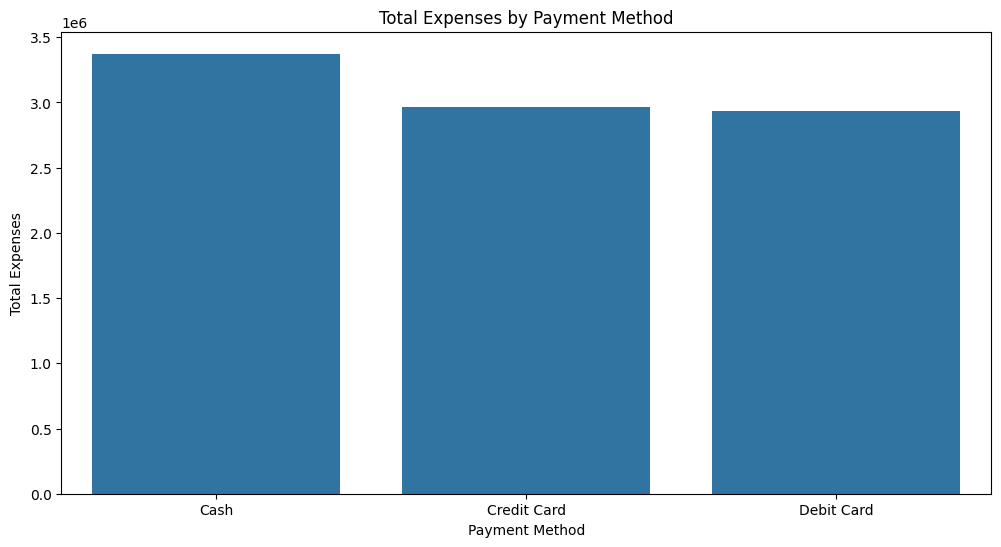

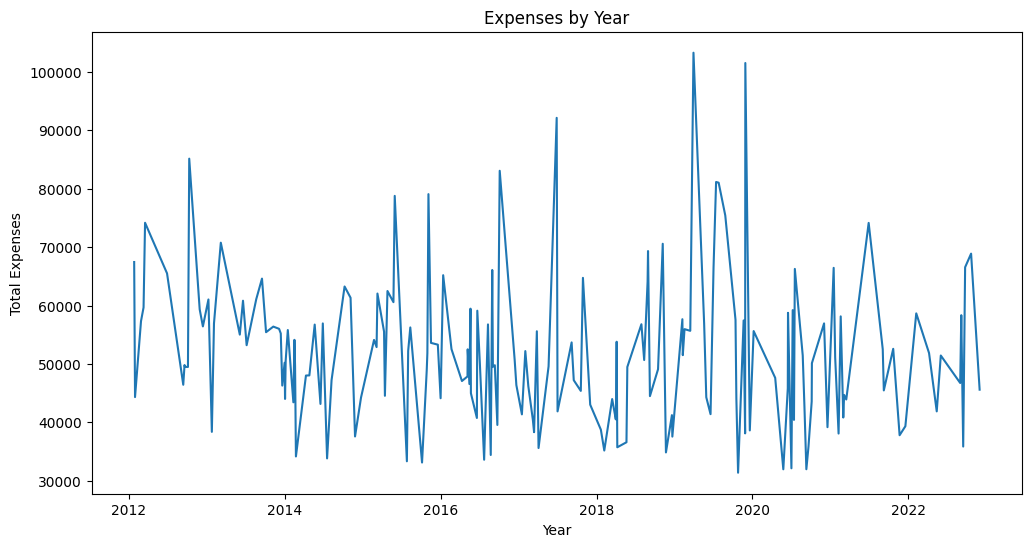

Total Expenses by Payment Method:
Payment method
Cash           3.373334e+06
Credit Card    2.965127e+06
Debit Card     2.935388e+06
Name: Expense, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('car1.csv')

# Handling missing or invalid values
df = df.replace('?', pd.NA)  # Replace '?' with NaN for further processing
df = df.apply(pd.to_numeric, errors='ignore')  # Convert columns to numeric, ignore errors

# Convert the 'Date' column to a datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Calculate expenses based on Price and Maintenance-Costs
df['Expense'] = df['Price'] + df['Maintenance-Costs']  # Adjust the calculation based on your specific expense calculation

# Convert the 'Expense' column to a numeric data type
df['Expense'] = pd.to_numeric(df['Expense'])

# Ensure that 'Payment method' is a categorical variable
df['Payment method'] = df['Payment method'].astype('category')

# Create a dashboard to show the expenses of different payment methods
# First, visualize the expenses based on payment method
plt.figure(figsize=(12, 6))
sns.barplot(x='Payment method', y='Expense', data=df, estimator=sum, ci=None)
plt.title('Total Expenses by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Expenses')
plt.show()

# Next, create a time-based analysis of expenses
# For example, expenses by year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Expense', data=df, estimator=sum, ci=None)
plt.title('Expenses by Year')
plt.xlabel('Year')
plt.ylabel('Total Expenses')
plt.show()

# You can further customize and create more visualizations based on your requirements and dataset.

# Finally, calculate the total expenses by payment method
total_expenses = df.groupby('Payment method')['Expense'].sum()
print("Total Expenses by Payment Method:")
print(total_expenses)


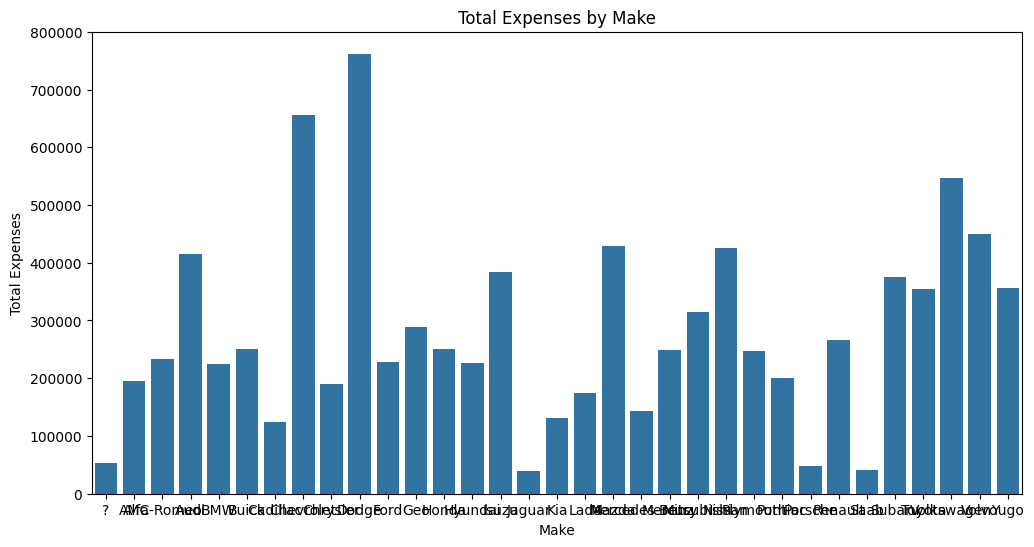

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('car1.csv')

# Select the categorical variable you want to visualize
categorical_variable = 'Make'  # Replace 'Make' with the column you want to visualize

# Ensure that the selected column is a categorical variable
df[categorical_variable] = df[categorical_variable].astype('category')

# Calculate expenses based on Price and Maintenance-Costs
df['Expense'] = df['Price'] + df['Maintenance-Costs']  # Adjust the calculation based on your specific expense calculation

# Convert the 'Expense' column to a numeric data type
df['Expense'] = pd.to_numeric(df['Expense'])

# Visualize the expenses based on the selected categorical variable using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=categorical_variable, y='Expense', data=df, estimator=sum, ci=None)
plt.title(f'Total Expenses by {categorical_variable}')
plt.xlabel(categorical_variable)
plt.ylabel('Total Expenses')
plt.show()


Select a categorical variable from ['Make', 'Fuel-Type', 'Body-Style']: Make
Enter Makes (comma-separated) you want to visualize: Audi,BMW,Chevrolet,Dodge


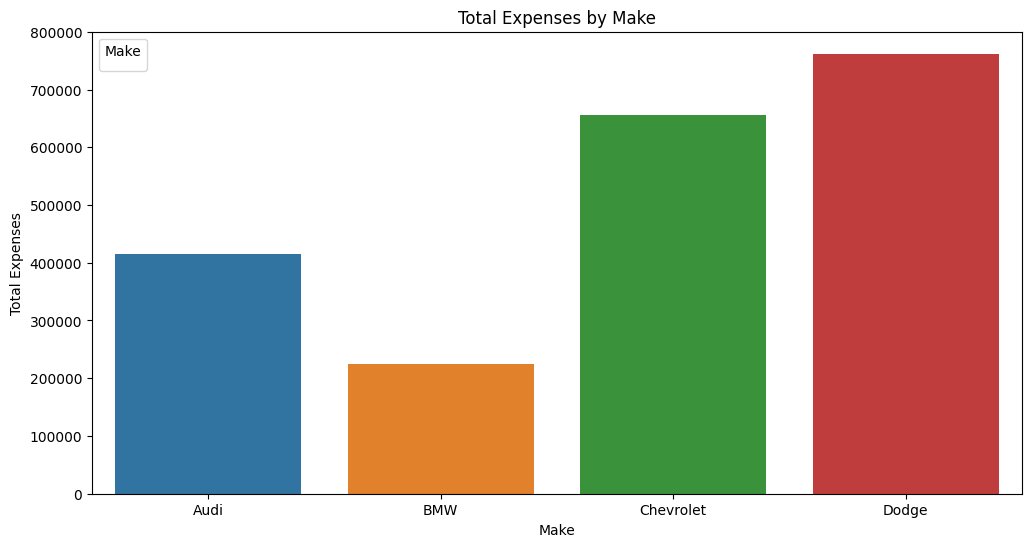

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('car1.csv')

# Define the list of categorical variables you want to visualize
categorical_variables = ['Make', 'Fuel-Type', 'Body-Style']

# Allow the user to select a specific categorical variable from the list
selected_variable = input(f"Select a categorical variable from {categorical_variables}: ")

# Check if the selected variable is in the list
if selected_variable not in categorical_variables:
    print(f"Selected variable '{selected_variable}' not found in the list.")
else:
    # Allow the user to select multiple values for the chosen variable
    selected_values = input(f"Enter {selected_variable}s (comma-separated) you want to visualize: ").split(',')

    # Filter the dataset for the selected values
    filtered_df = df[df[selected_variable].isin(selected_values)]

    # Calculate expenses based on Price and Maintenance-Costs
    filtered_df['Expense'] = filtered_df['Price'] + filtered_df['Maintenance-Costs']

    # Convert the 'Expense' column to a numeric data type
    filtered_df['Expense'] = pd.to_numeric(filtered_df['Expense'])

    # Visualize the expenses for the selected values using a bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(x=selected_variable, y='Expense', hue=selected_variable, data=filtered_df, estimator=sum, ci=None)
    plt.title(f'Total Expenses by {selected_variable}')
    plt.xlabel(selected_variable)
    plt.ylabel('Total Expenses')
    plt.legend(title=selected_variable)
    plt.show()


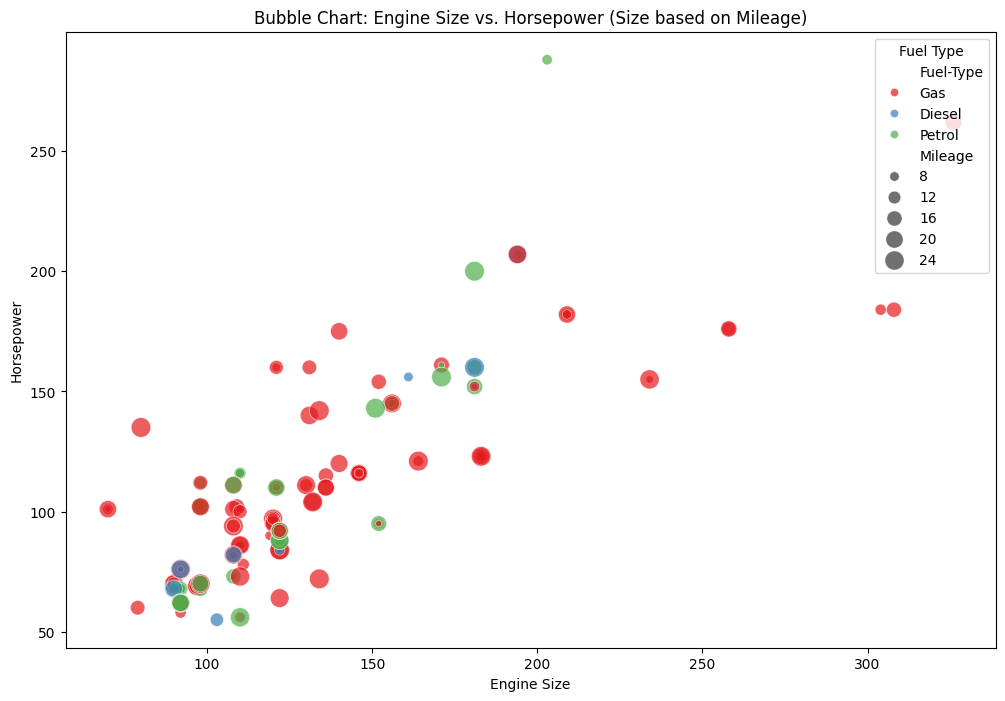

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('car1.csv')

# Handling missing or invalid values
df = df.replace('?', pd.NA)  # Replace '?' with NaN for further processing
df = df.apply(pd.to_numeric, errors='ignore')  # Convert columns to numeric, ignore errors

# Clean column names by removing leading and trailing whitespaces
df.columns = df.columns.str.strip()

# Ensure that the selected columns are numeric
numeric_columns = ['engine-size', 'horsepower', 'Mileage']

# Check if the columns exist in the DataFrame
for col in numeric_columns:
    if col not in df.columns:
        print(f"Column '{col}' not found in the dataset.")

# Visualize the Bubble Chart only if the columns exist
if all(col in df.columns for col in numeric_columns):
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

    # Visualize the Bubble Chart with different colors based on 'Fuel-Type'
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='engine-size', y='horsepower', size='Mileage', hue='Fuel-Type', data=df, sizes=(20, 200), alpha=0.7, palette='Set1')
    plt.title('Bubble Chart: Engine Size vs. Horsepower (Size based on Mileage)')
    plt.xlabel('Engine Size')
    plt.ylabel('Horsepower')
    plt.legend(title='Fuel Type', loc='upper right')
    plt.show()
else:
    print("Cannot visualize the Bubble Chart. Some columns are missing.")
